In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# define a function to read first and second column from csv file
def read_csv(csv_file):
    coordinates = []
    with open(csv_file, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            try:
                x = float(row[1])
                y = float(row[2])
                coordinates.append((x,y))
            except ValueError:
                print(f"ignoring line {row}")
    return coordinates

#define function for moving average
# def moving_average(coordinates, window_size):
#     moving_avg = []
#     for i in range(len(coordinates)-window_size+1):
#         avg = 0
#         for j in range(window_size):
#             avg += coordinates[i+j][1]
#         avg = avg/window_size
#         moving_avg.append(avg)
#     return moving_avg

def moving_average(coordinates, window_size):
    smoothed_coordinates = []
    half_window = window_size // 2
    
    for i in range(len(coordinates)):
        if i < half_window or i >= len(coordinates) - half_window:
            smoothed_coordinates.append(coordinates[i])
        else:
            sum_x = sum([coord[0] for coord in coordinates[i-half_window:i+half_window+1]])
            sum_y = sum([coord[1] for coord in coordinates[i-half_window:i+half_window+1]])
            smoothed_x = sum_x / window_size
            smoothed_y = sum_y / window_size
            smoothed_coordinates.append((smoothed_x, smoothed_y))
    return smoothed_coordinates
        
    
#     return smoothed_coordinates
# def moving_average(coordinates, window_size, threshold):
#     smoothed_coordinates = []
#     half_window = window_size // 2
    
#     for i in range(len(coordinates)):
#         if i < half_window or i >= len(coordinates) - half_window:
#             smoothed_coordinates.append(coordinates[i])
#         else:
#             sum_x = sum([coord[0] for coord in coordinates[i-half_window:i+half_window+1]])
#             sum_y = sum([coord[1] for coord in coordinates[i-half_window:i+half_window+1]])
#             smoothed_x = sum_x / window_size
#             smoothed_y = sum_y / window_size
            
#             # Check if the current coordinate deviates from the moving average by the threshold
#             if abs(coordinates[i][0] - smoothed_x) > threshold or abs(coordinates[i][1] - smoothed_y) > threshold:
#                 # Replace the outlier with the moving average of the last three coordinates
#                 smoothed_x = sum([coord[0] for coord in coordinates[i-half_window:i+1]]) / (half_window + 1)
#                 smoothed_y = sum([coord[1] for coord in coordinates[i-half_window:i+1]]) / (half_window + 1)
            
#             smoothed_coordinates.append((smoothed_x, smoothed_y))
    
#     return smoothed_coordinates



csv_file = 'TestVid2_deepocsort.csv'
window_size = 5
threshold = 50
orig_coordinates = read_csv(csv_file)
smoothed_coordinates = moving_average(orig_coordinates, window_size)

#print the original and smoothed coordinates
print('Original coordinates: ', orig_coordinates)
for x in orig_coordinates:
    print(x)
print('Smoothed coordinates: ', smoothed_coordinates)
for y in smoothed_coordinates:
    print(y)
    

ignoring line ['ï»¿num', 'x', 'y', 'h', 'w']
Original coordinates:  [(718.0, 426.0), (719.0, 429.0), (720.0, 432.0), (722.0, 438.0), (723.0, 442.0), (725.0, 449.0), (727.0, 452.0), (729.0, 439.0), (731.0, 430.0), (733.0, 422.0), (734.0, 414.0), (736.0, 407.0), (736.0, 401.0), (739.0, 397.0), (740.0, 391.0), (742.0, 388.0), (742.0, 383.0), (744.0, 380.0), (744.0, 377.0), (745.0, 375.0), (746.0, 373.0), (748.0, 372.0), (749.0, 372.0), (750.0, 371.0), (751.0, 370.0), (752.0, 370.0), (752.0, 370.0), (753.0, 370.0), (754.0, 371.0), (755.0, 372.0), (756.0, 373.0), (757.0, 373.0), (758.0, 375.0), (759.0, 377.0), (760.0, 380.0), (761.0, 381.0), (761.0, 383.0), (762.0, 386.0), (763.0, 388.0), (769.0, 394.0), (773.0, 398.0), (776.0, 401.0), (779.0, 405.0), (782.0, 409.0), (786.0, 414.0), (789.0, 420.0), (794.0, 426.0), (797.0, 431.0), (802.0, 438.0), (805.0, 445.0), (809.0, 452.0), (813.0, 460.0), (817.0, 468.0), (822.0, 476.0), (826.0, 486.0), (831.0, 496.0), (836.0, 506.0), (844.0, 505.0), (84

In [95]:
#convert the smoothed coordinates to a csv file
with open('TestVid2_deepocsort_smoothedv5.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(smoothed_coordinates)

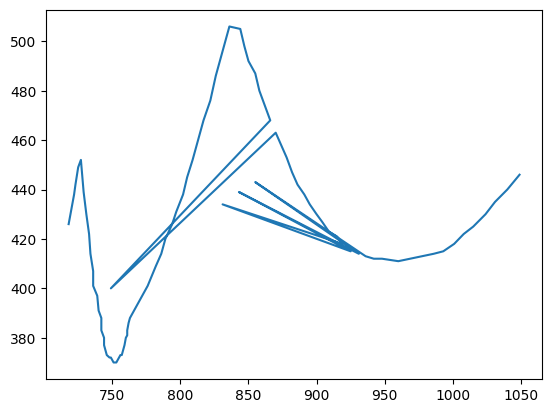

In [93]:
#plot the original and smoothed coordinates
x = [coord[0] for coord in orig_coordinates]
y = [coord[1] for coord in orig_coordinates]
plt.plot(x, y, label='original')


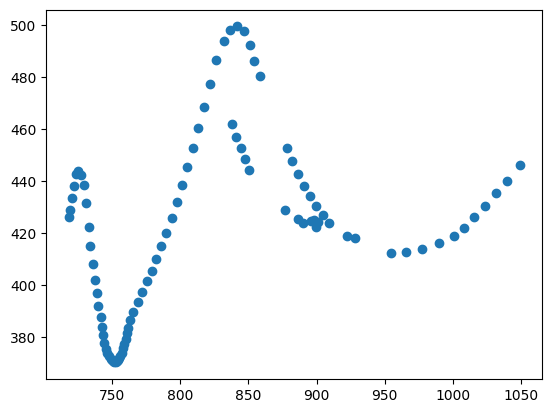

In [3]:
#plot the smoothed coordinates
a = [coord[0] for coord in smoothed_coordinates]
b = [coord[1] for coord in smoothed_coordinates]
plt.scatter(a, b, label='smoothed')

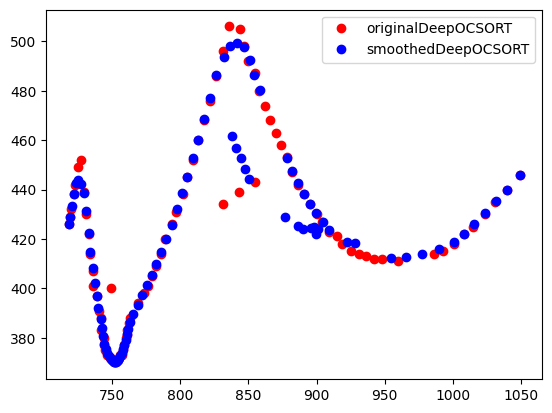

In [94]:
plt.plot(x, y, 'ro', label='originalDeepOCSORT')
plt.plot(a, b, 'bo', label='smoothedDeepOCSORT')
plt.legend()
plt.show()

Here, we will simply compute the difference between two points and if it exceeds threshold we will just use previous coordinate + distance between previous two coordinates.

In [1]:
import math
import csv
import numpy as np
import matplotlib.pyplot as plt

# define a function to read first and second column from csv file
def read_csv(csv_file):
    coordinates = []
    with open(csv_file, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            try:
                x = float(row[0])
                y = float(row[1])
                coordinates.append((x,y))
            except ValueError:
                print(f"ignoring line {row}")
    return coordinates

def adjust_coordinates(original_coordinates, threshold):
    adjusted_coordinates = [original_coordinates[0]]  # Start with the first coordinate
    
    for i in range(1, len(original_coordinates)):
        x, y = original_coordinates[i]
        prev_x, prev_y = adjusted_coordinates[i-1]
        
        # Calculate the Euclidean distance between the current and previous points
        distance = math.sqrt((x - prev_x)**2 + (y - prev_y)**2)
        
        #calculate the distance between the previous two points
        distance2 = math.sqrt((prev_x - adjusted_coordinates[i-2][0])**2 + (prev_y - adjusted_coordinates[i-2][1])**2)
        
        #if distance between current and previous points is greater than distance between previous two points and threshold, adjust the coordinates
        if distance > distance2 + threshold:
            # If the distance exceeds the threshold, adjust the coordinates
            prev_prev_x, prev_prev_y = adjusted_coordinates[i-2]
            diff_x = abs(prev_x - prev_prev_x)
            diff_y = abs(prev_y - prev_prev_y)
            adjusted_x = prev_x + diff_x
            adjusted_y = prev_y + diff_y
            adjusted_coordinates.append((adjusted_x, adjusted_y))
        else:
            adjusted_coordinates.append((x, y))
            
        # if distance > threshold:
        #     # If the distance exceeds the threshold, adjust the coordinates
        #     prev_prev_x, prev_prev_y = original_coordinates[i-2]  # Previous two points
        #     diff_x = prev_x - prev_prev_x
        #     diff_y = prev_y - prev_prev_y
        #     adjusted_x = x + diff_x
        #     adjusted_y = y + diff_y
        #     adjusted_coordinates.append((adjusted_x, adjusted_y))
        # else:
        #     adjusted_coordinates.append((x, y))
    
    return adjusted_coordinates

csv_file = 'img1248\TestVid2_deepocsort.csv'
# window_size = 3
# threshold = 50
orig_coordinates = read_csv(csv_file)
# smoothed_coordinates = moving_average(orig_coordinates, window_size, threshold)
# Example usage
# original_coordinates = [(10, 20), (12, 22), (26, 34), (60, 85), (50, 70), (40, 55)]
threshold = 20

adjusted_coordinates = adjust_coordinates(orig_coordinates, threshold)

# Print the original and adjusted coordinates
print("Original Coordinates:")
for coord in orig_coordinates:
    print(coord)

print("\nAdjusted Coordinates:")
for coord in adjusted_coordinates:
    print(coord)


ignoring line ['x', 'y']
Original Coordinates:
(724.5, 431.5)
(726.0, 436.0)
(727.5, 439.0)
(729.0, 444.5)
(731.0, 449.5)
(732.5, 456.5)
(734.5, 459.5)
(736.0, 446.0)
(737.5, 437.0)
(740.0, 428.5)
(741.0, 420.5)
(742.5, 413.5)
(743.0, 407.5)
(745.0, 403.0)
(746.0, 397.5)
(748.0, 394.0)
(748.5, 389.5)
(750.5, 386.5)
(751.0, 384.0)
(751.5, 381.5)
(752.5, 379.5)
(754.0, 378.5)
(755.5, 378.0)
(756.5, 377.0)
(757.0, 376.0)
(758.0, 376.0)
(758.5, 376.0)
(759.5, 376.0)
(760.0, 377.0)
(761.0, 378.0)
(761.5, 379.0)
(762.5, 379.0)
(763.5, 381.0)
(764.5, 382.5)
(765.5, 385.0)
(766.0, 386.0)
(766.0, 388.0)
(767.0, 391.0)
(768.5, 393.5)
(774.0, 399.0)
(778.0, 403.0)
(780.5, 406.0)
(784.5, 410.5)
(787.5, 414.5)
(791.0, 419.0)
(794.5, 425.0)
(798.5, 430.5)
(802.0, 436.5)
(806.5, 442.5)
(810.0, 449.5)
(814.0, 457.0)
(818.0, 464.5)
(822.5, 473.0)
(827.0, 481.0)
(832.0, 491.5)
(836.0, 501.5)
(841.5, 511.5)
(849.5, 511.0)
(852.5, 504.5)
(856.5, 498.0)
(860.5, 492.5)
(864.0, 485.5)
(867.5, 479.5)
(872.0, 

In [2]:
#convert the adjusted coordinates to a csv file
with open('Instance1_DeepOCSORT.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(adjusted_coordinates)

In [41]:
x,y = orig_coordinates[1]
print(x,y)

719.0 429.0


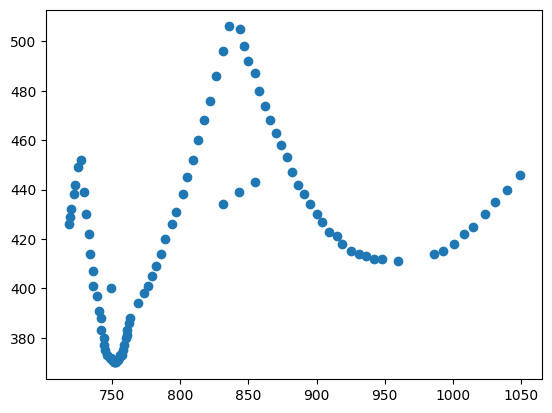

In [106]:
#plot the original coordinates
x = [coord[0] for coord in orig_coordinates]
y = [coord[1] for coord in orig_coordinates]
plt.scatter(x, y, label='original')

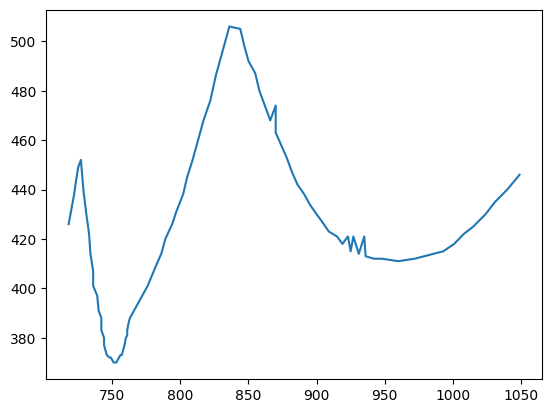

In [103]:
#plot the original and adjusted coordinates
x1 = [coord[0] for coord in adjusted_coordinates]
y1 = [coord[1] for coord in adjusted_coordinates]
plt.plot(x1, y1, label='adjusted')

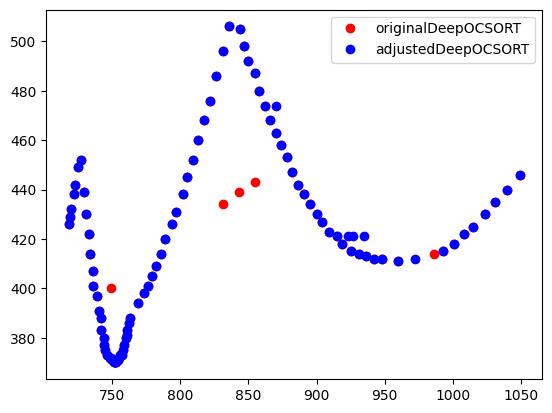

In [104]:
plt.plot(x, y, 'ro', label='originalDeepOCSORT')
plt.plot(x1, y1, 'bo', label='adjustedDeepOCSORT')
plt.legend()
plt.show()

In [1]:
def extrapolate_next_points(coordinates, num_points):
    next_points = []
    last_x, last_y, last_z = coordinates[-1]
    prev_x, prev_y, prev_z = coordinates[-2]
    
    diff_x = last_x - prev_x
    diff_y = last_y - prev_y
    diff_z = last_z - prev_z
    for _ in range(num_points):
        next_x = last_x + diff_x
        next_y = last_y + diff_y
        next_z = last_z + diff_z
        next_points.append((next_x, next_y, next_z))
        last_x, last_y, last_z = next_x, next_y, next_z
    
    return next_points


In [3]:
coord = [(718.5,422,4874.22998), (723,423,4817.922363), (721,426,5044.953125), (721.5,426.5,6582.418945)]

In [4]:
num_next_points = 2
next_points = extrapolate_next_points(coord, num_next_points)

In [5]:
print("\nExtrapolated Next Points:")
for coord in next_points:
    print(coord)


Extrapolated Next Points:
(722.0, 427.0, 8119.884765000001)
(722.5, 427.5, 9657.350585)


In [4]:
import math

def estimate_z(x, y, initial_position, initial_velocity, time):
    g = 9.8  # Acceleration due to gravity

    # Extract initial position and velocity values
    x0, y0, z0 = initial_position
    vx0, vy0, vz0 = initial_velocity

    # Calculate time-dependent values
    x_t = x0 + vx0 * time
    y_t = y0 + vy0 * time
    z_t = z0 + vz0 * time - 0.5 * g * time**2

    # Calculate distance between known (x, y) and estimated (x_t, y_t)
    distance = math.sqrt((x - x_t)**2 + (y - y_t)**2)

    return z_t, distance


# Example usage
initial_position = [464.5, 282.5, 14996.0]  # Initial position (x0, y0, z0)
initial_velocity = [0, -9.81, 9.81]  # Initial velocity (vx0, vy0, vz0)
known_x = 5
known_y = 5
time = 0.1  # Time at which to estimate the value of 'z'

estimated_z, distance = estimate_z(known_x, known_y, initial_position, initial_velocity, time)

print(f"Estimated z: {estimated_z}")
print(f"Distance from known (x, y): {distance}")


Estimated z: 14996.931999999999
Distance from known (x, y): 536.2863109953488
